In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')
df.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
df.shape

(1014, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
df.RiskLevel.unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

<Axes: xlabel='RiskLevel'>

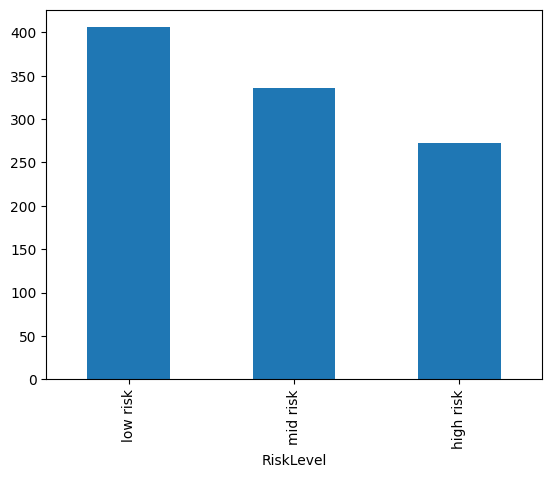

In [ ]:
df.RiskLevel.value_counts().plot.bar()

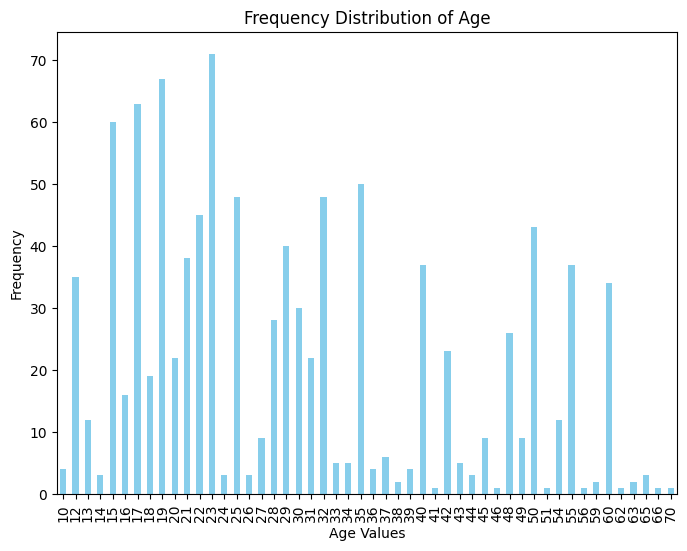

In [ ]:
import matplotlib.pyplot as plt

# Plot frequency distribution of Age
plt.figure(figsize=(8, 6))
df['Age'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of Age')
plt.xlabel('Age Values')
plt.ylabel('Frequency')
plt.show()

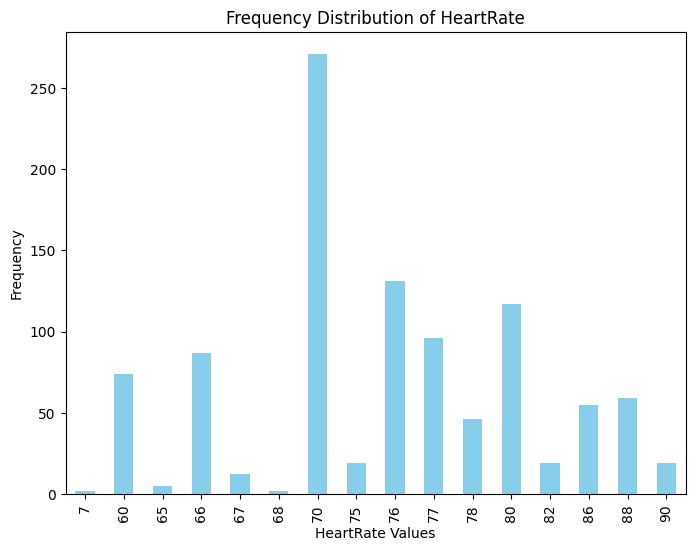

In [ ]:
import matplotlib.pyplot as plt

# Plot frequency distribution of Age
plt.figure(figsize=(8, 6))
df['HeartRate'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of HeartRate')
plt.xlabel('HeartRate Values')
plt.ylabel('Frequency')
plt.show()

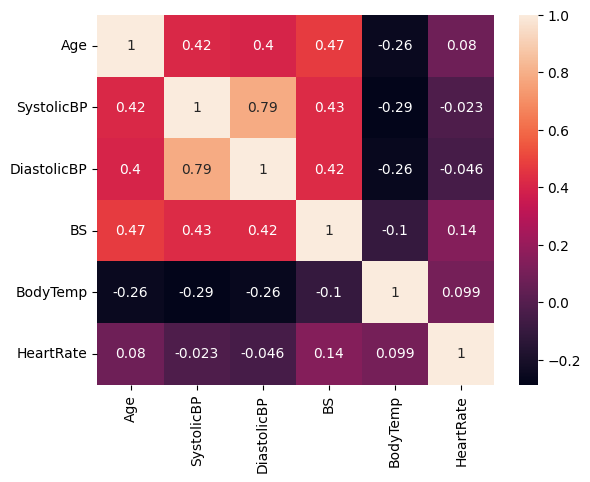

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

In [ ]:
d = {
    "low risk": 0,
    "mid risk": 1,
    "high risk": 2
}

df['RiskLevel'].replace(to_replace=d, inplace=True)

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [ ]:
X = df.drop('RiskLevel',axis=1)
y = df['RiskLevel']

##Splitting of Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split( X, y, test_size=0.20, random_state=30)
X_train = X_train.reset_index(drop=True)
X_test  = X_test.reset_index(drop=True)
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)

X_train Shape:  (811, 6)
y_train Shape:  (811,)
X_test Shape: (203, 6)
y_test Shape: (203,)


##Standardization

In [ ]:
from sklearn import preprocessing
stdscaler = preprocessing.StandardScaler().fit(X_train)
print("Means of columns: ", stdscaler.mean_, "\nStandard deviation of columns:", stdscaler.scale_)

X_scaled  = stdscaler.transform(X)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

print("X unscaled: ", X[0:5])
print("X scaled:   ", X_scaled[0:5])

Means of columns:  [ 30.28853268 113.15166461  76.41430333   8.73892725  98.63551171
  74.44266338] 
Standard deviation of columns: [13.75245672 18.40235152 13.93355706  3.31890742  1.34225516  7.88465583]
X unscaled:     Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
0   25         130           80  15.0      98.0         86
1   35         140           90  13.0      98.0         70
2   29          90           70   8.0     100.0         80
3   30         140           85   7.0      98.0         70
4   35         120           60   6.1      98.0         76
X scaled:    [[-0.38455185  0.91555339  0.25734252  1.88648611 -0.47346565  1.46580103]
 [ 0.34259096  1.45896221  0.97503434  1.28387816 -0.47346565 -0.56345686]
 [-0.09369473 -1.25808186 -0.46034931 -0.22264172  1.01656401  0.70482932]
 [-0.02098045  1.45896221  0.61618843 -0.52394569 -0.47346565 -0.56345686]
 [ 0.34259096  0.37214458 -1.17804113 -0.79511927 -0.47346565  0.19751485]]


##Decision Trees

Accuracy: 0.8374384236453202
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83        82
           1       0.72      0.79      0.75        61
           2       0.98      0.92      0.95        60

    accuracy                           0.84       203
   macro avg       0.85      0.84      0.84       203
weighted avg       0.84      0.84      0.84       203



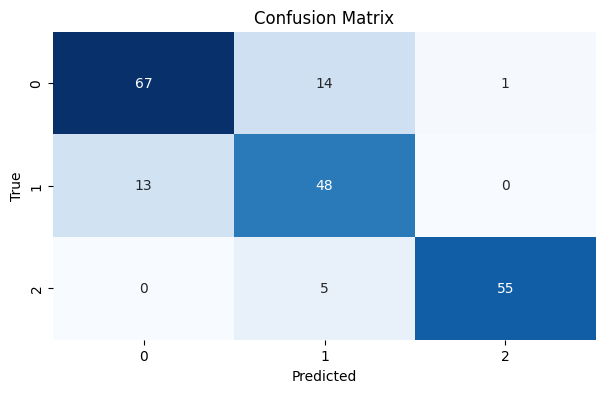

In [ ]:
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)
predicted = dtc.predict(X_test_scaled)
cm = confusion_matrix(y_test, predicted)
print("Accuracy:", accuracy_score(y_test, predicted))
print("Classification Report:\n", classification_report(y_test, predicted))
# Plot the confusion matrix
plt.figure(figsize=(7, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


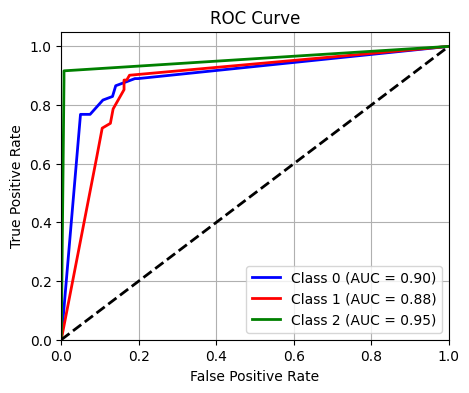

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Binarize the output labels (for multi-class classification)
n_classes = len(set(y_test))  # Get number of unique classes
y_test_binarized = label_binarize(y_test, classes=[i for i in range(n_classes)])

# Get predicted probabilities for each class
y_prob = dtc.predict_proba(X_test_scaled)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(5, 4))
colors = cycle(['blue', 'red', 'green'])  # Cycle through colors for each class

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Formatting the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Accuracy: 0.8472906403940886
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84        82
           1       0.71      0.82      0.76        61
           2       1.00      0.92      0.96        60

    accuracy                           0.85       203
   macro avg       0.86      0.85      0.85       203
weighted avg       0.86      0.85      0.85       203



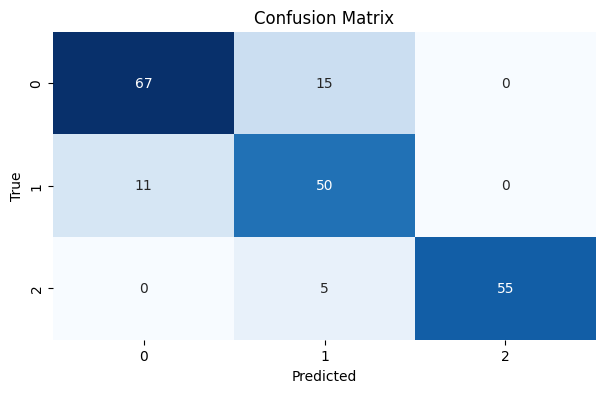

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a RandomForestClassifier
rf = RandomForestClassifier(max_depth=None, max_features= 'sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=50)
rf.fit(X_train_scaled, y_train)
predicted = rf.predict(X_test_scaled)
cm = confusion_matrix(y_test, predicted)
print("Accuracy:", accuracy_score(y_test, predicted))
print("Classification Report:\n", classification_report(y_test, predicted))
# Plot the confusion matrix
plt.figure(figsize=(7, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##Random forest Model

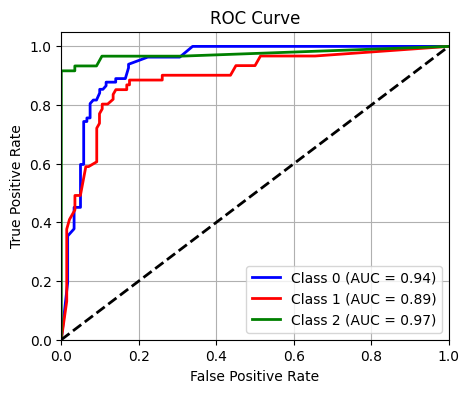

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Binarize the output labels (for multi-class classification)
n_classes = len(set(y_test))  # Get number of unique classes
y_test_binarized = label_binarize(y_test, classes=[i for i in range(n_classes)])

# Get predicted probabilities for each class
y_prob = rf.predict_proba(X_test_scaled)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(5, 4))
colors = cycle(['blue', 'red', 'green'])  # Cycle through colors for each class

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Formatting the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


##XGB Model

XGB Model Accuracy: 0.8669950738916257
XGB ModelClassification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87        82
           1       0.77      0.79      0.78        61
           2       1.00      0.92      0.96        60

    accuracy                           0.87       203
   macro avg       0.87      0.86      0.87       203
weighted avg       0.87      0.87      0.87       203



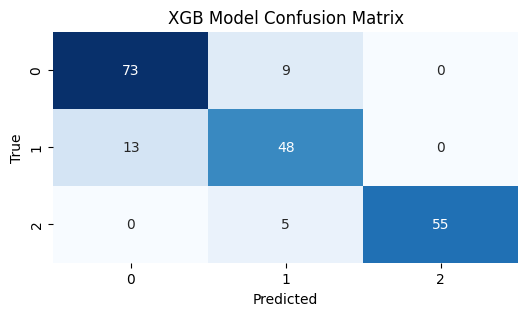

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create XGBoost classifier instance with hyperparameter values
xgb = XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=7,
    n_estimators=100,
    subsample=1.0
)

# Fit the model to the training data
xgb.fit(X_train_scaled, y_train)

# Make predictions on the test set
predicted = xgb.predict(X_test_scaled)

# Print accuracy
print('XGB Model Accuracy:', accuracy_score(y_test, predicted))

# Print classification report
print('XGB ModelClassification Report:\n', classification_report(y_test, predicted))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, predicted)

# Plot the confusion matrix in a larger size
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('XGB Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


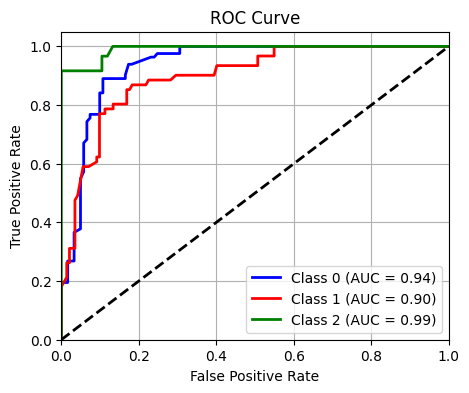

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Binarize the output labels (for multi-class classification)
n_classes = len(set(y_test))  # Get number of unique classes
y_test_binarized = label_binarize(y_test, classes=[i for i in range(n_classes)])

# Get predicted probabilities for each class
y_prob = xgb.predict_proba(X_test_scaled)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(5, 4))
colors = cycle(['blue', 'red', 'green'])  # Cycle through colors for each class

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Formatting the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


#LDA Model

LDA accuracy 0.6108374384236454
LDA Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.78      0.71        82
           1       0.37      0.39      0.38        61
           2       0.92      0.60      0.73        60

    accuracy                           0.61       203
   macro avg       0.65      0.59      0.61       203
weighted avg       0.64      0.61      0.62       203



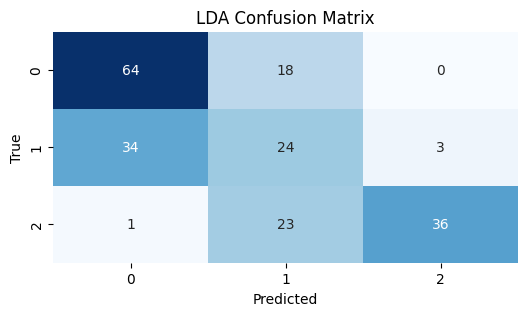

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
lda = LinearDiscriminantAnalysis(shrinkage=0.1, solver='lsqr')
lda.fit(X_train_scaled, y_train)
predicted = lda.predict(X_test_scaled)
print('LDA accuracy', accuracy_score(y_test,predicted))
# Print classification report
print('LDA Classification Report:\n', classification_report(y_test, predicted))
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, predicted)
# Plot the confusion matrix in a larger size
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('LDA Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


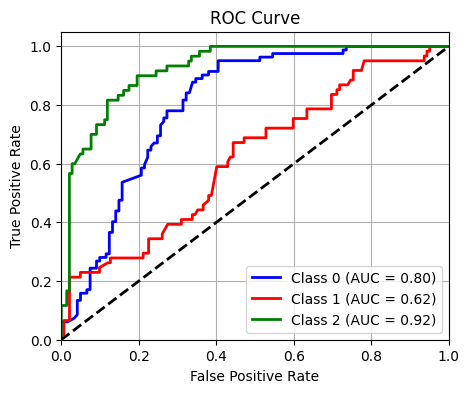

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Binarize the output labels (for multi-class classification)
n_classes = len(set(y_test))  # Get number of unique classes
y_test_binarized = label_binarize(y_test, classes=[i for i in range(n_classes)])

# Get predicted probabilities for each class
y_prob = lda.predict_proba(X_test_scaled)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(5, 4))
colors = cycle(['blue', 'red', 'green'])  # Cycle through colors for each class

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Formatting the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


##CNN Model

Epoch 1/30


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3206 - loss: 1.1022 - val_accuracy: 0.5911 - val_loss: 0.9663
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5673 - loss: 0.9478 - val_accuracy: 0.6108 - val_loss: 0.8684
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5618 - loss: 0.9021 - val_accuracy: 0.6207 - val_loss: 0.8118
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5925 - loss: 0.8502 - val_accuracy: 0.6158 - val_loss: 0.7905
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6027 - loss: 0.8221 - val_accuracy: 0.6404 - val_loss: 0.7732
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6480 - loss: 0.8029 - val_accuracy: 0.6502 - val_loss: 0.7573
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6326 - loss: 0.7755 - val_accuracy: 0.6601 - val_loss: 0.7528
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6156 - loss: 0.8077 - val_accuracy: 0.6453 - val_loss: 0.7454
Ep

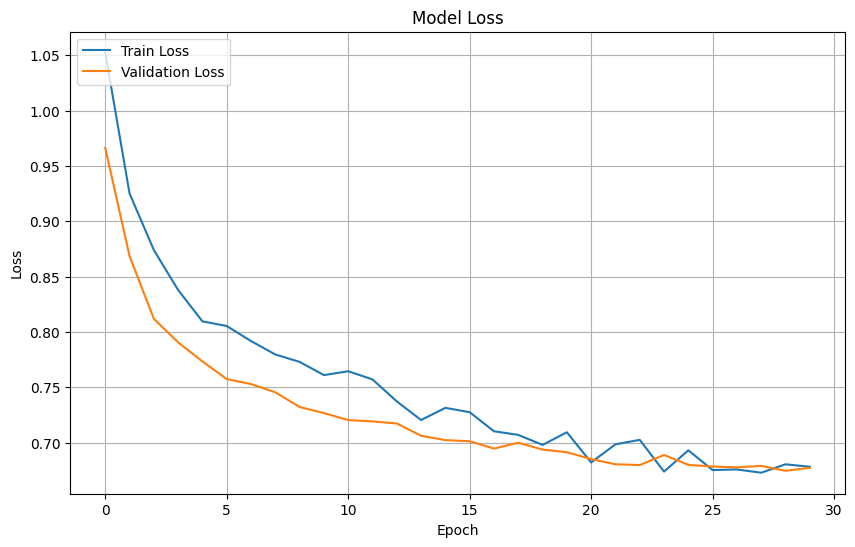

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Maternal Health Risk Data Set.csv")

# Feature matrix (X) and target vector (y)
X = df.drop('RiskLevel', axis=1).values
y = df['RiskLevel'].values

# Encode the labels (RiskLevel) as integers for classification
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# One-hot encode the target for multiclass classification
y_categorical = to_categorical(y_encoded)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Scale the feature matrix
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for 1D CNN (samples, timesteps, features)
X_train_cnn = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the 1D CNN model
model = Sequential()

# Add 1D convolutional layer with 32 filters, kernel size of 3, ReLU activation
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))

# Add a max pooling layer to downsample
model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

# Fully connected dense layer with 64 units and ReLU activation
model.add(Dense(64, activation='relu'))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Output layer with softmax activation for multiclass classification
model.add(Dense(y_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_cnn, y_train, epochs=30, batch_size=32, validation_data=(X_test_cnn, y_test))


# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7149 - loss: 0.6619 


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Test Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

   high risk       0.76      0.94      0.84        47
    low risk       0.61      0.89      0.72        80
    mid risk       0.83      0.32      0.46        76

    accuracy                           0.68       203
   macro avg       0.73      0.71      0.67       203
weighted avg       0.73      0.68      0.65       203



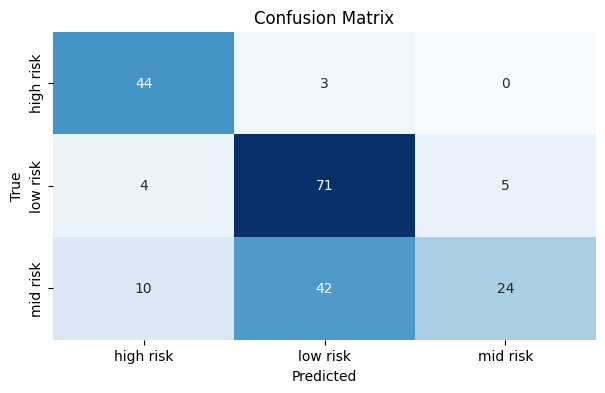

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_cnn, y_test)
# Predict on the test set
y_pred = np.argmax(model.predict(X_test_cnn), axis=1)
y_true = np.argmax(y_test, axis=1)
print(f'Test Accuracy: {test_acc:.2f}')
# Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(7, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


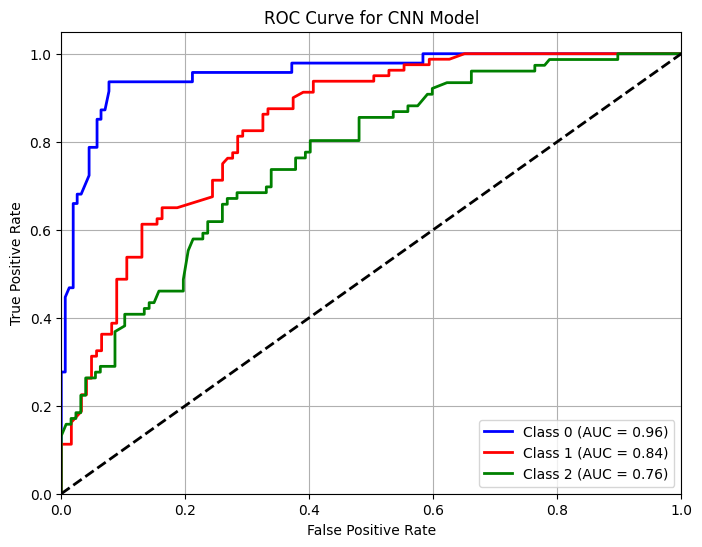

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Assuming you have already trained your CNN model and have y_test and y_prob_cnn
# Binarize the output labels (for multi-class classification)
n_classes = y_categorical.shape[1]  # Number of unique classes from one-hot encoded labels
y_test_binarized = label_binarize(y_test.argmax(axis=1), classes=[i for i in range(n_classes)])

# Get predicted probabilities for each class from the CNN model
y_prob_cnn = model.predict(X_test_cnn)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob_cnn[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_prob_cnn[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])  # Cycle through colors for each class

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Formatting the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CNN Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
pip install matplotlib pdpbox

In [ ]:
pip install pdpbox --upgrade

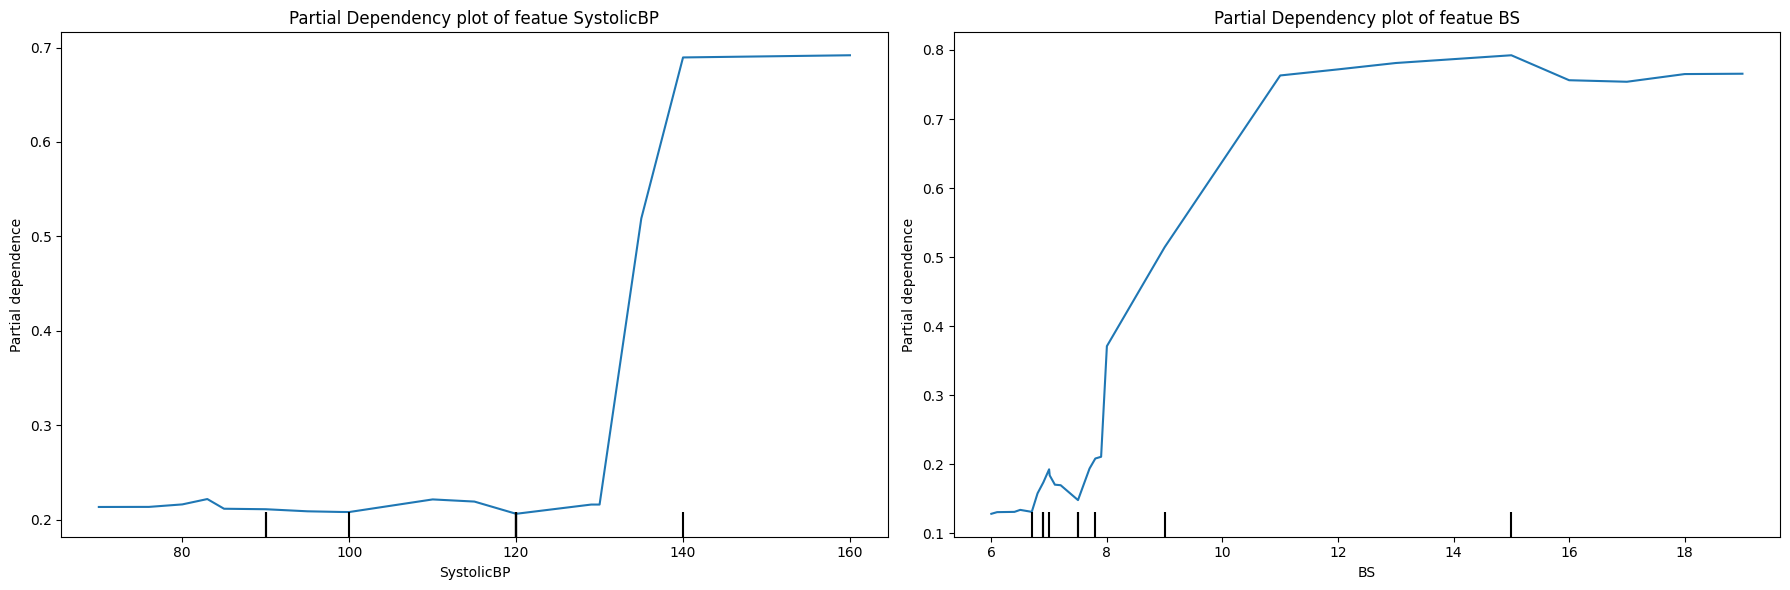

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Load your maternal health dataset
df = pd.read_csv('Maternal Health Risk Data Set.csv')

target = 'RiskLevel'
features = [col for col in df.columns if col != target]

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)

# Random Forest Model
model = RandomForestClassifier(max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=200)
model.fit(train_data[features], train_data[target])

# features of interest
features_of_interest = ['SystolicBP', 'BS']

# Create individual subplots for each feature
fig, axs = plt.subplots(1, len(features_of_interest), figsize=(18, 6), sharey=True)

for i, feature in enumerate(features_of_interest):
    axs[i].set_title(f'Partial Dependency plot of featue {feature}')
    PartialDependenceDisplay.from_estimator(model, test_data[features], [feature], target='high risk', ax=axs[i])

plt.tight_layout()
plt.show()

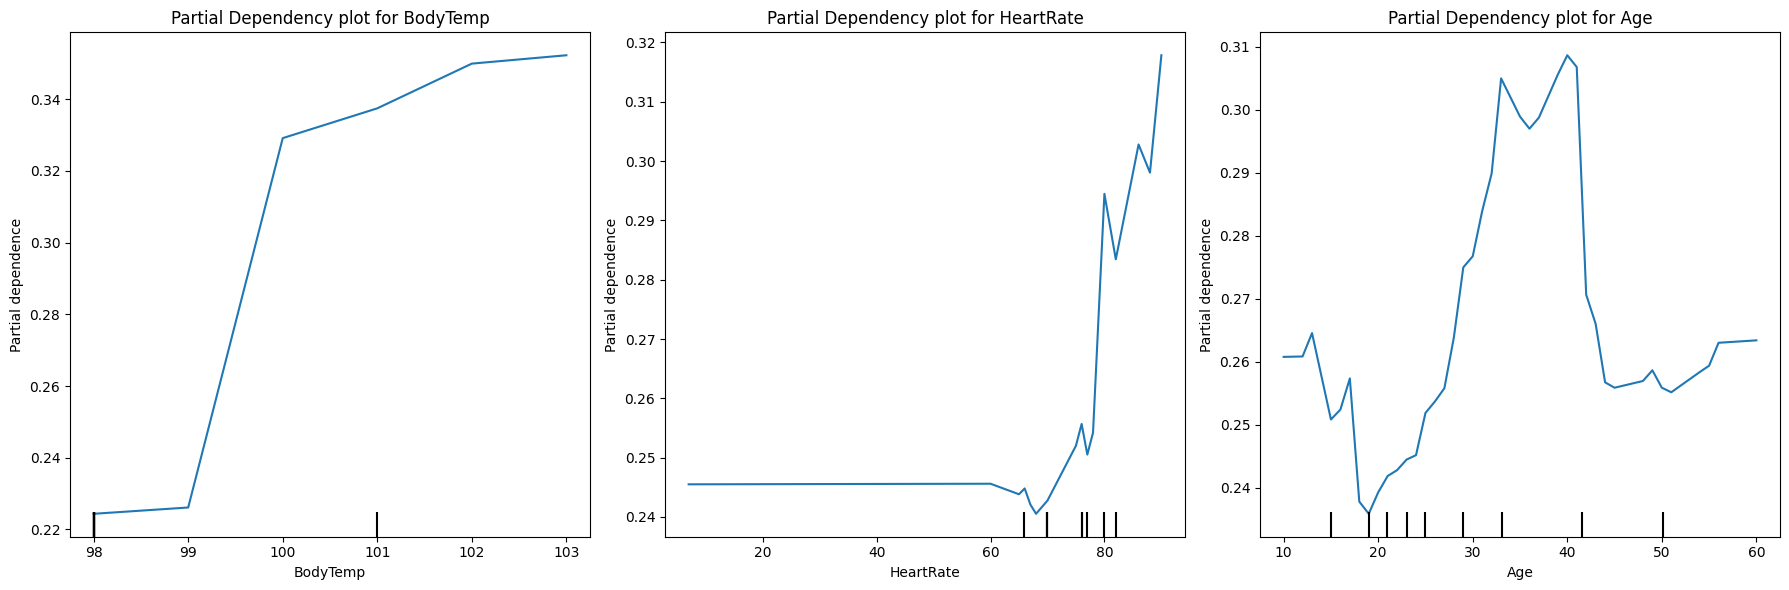

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Load your maternal health dataset
df = pd.read_csv('Maternal Health Risk Data Set.csv')

# Assume 'target' is the column you want to predict
target = 'RiskLevel'
features = [col for col in df.columns if col != target]

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)

# Random Forest Model
model = RandomForestClassifier(max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=200)
model.fit(train_data[features], train_data[target])

# Specify the features of interest
features_of_interest = ['BodyTemp', 'HeartRate','Age']  # Add more features as needed

# Create individual subplots for each feature
fig, axs = plt.subplots(1, len(features_of_interest), figsize=(18, 6), sharey=True)

for i, feature in enumerate(features_of_interest):
    axs[i].set_title(f'Partial Dependency plot for {feature}')
    PartialDependenceDisplay.from_estimator(model, test_data[features], [feature], target='high risk', ax=axs[i])

plt.tight_layout()
plt.show()

In [ ]:
pip install shap==0.44.0

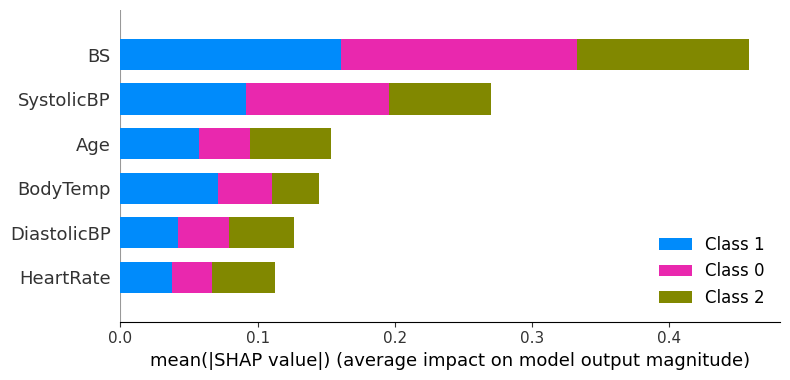

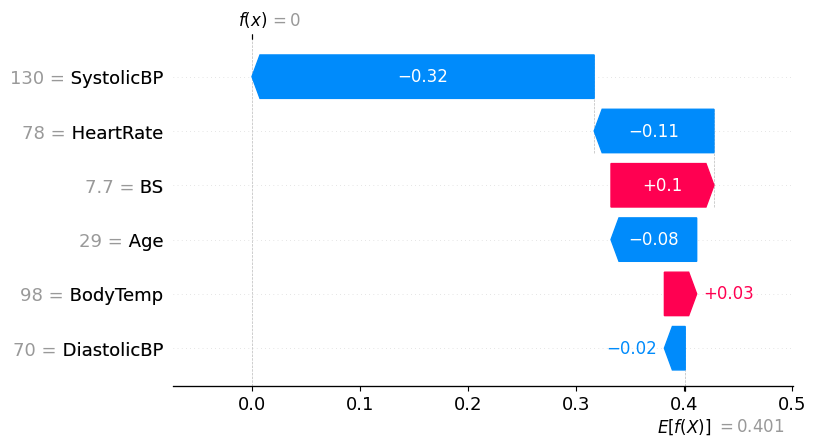

In [ ]:
# Import necessary libraries
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('Maternal Health Risk Data Set.csv')
y = df['RiskLevel']
X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Random Forest Model
model = RandomForestClassifier(max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=200)
model.fit(X_train, y_train)

# Explain the model predictions using SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)
# Force plot for a specific instance (replace 'index_of_interest' with the actual index)
index_of_interest = 0
shap.force_plot(explainer.expected_value[1], shap_values[1][index_of_interest, :], X_test.iloc[index_of_interest, :])
# Waterfall plot for a specific instance
shap.waterfall_plot(shap.Explanation(values=shap_values[1][index_of_interest, :], base_values=explainer.expected_value[1], data=X_test.iloc[index_of_interest, :]))

# Stochastic Logistic regression

In [ ]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Set sparse_output=False to get a dense array
encoder = OneHotEncoder(sparse_output=False)
target = encoder.fit_transform(df[['RiskLevel']])


In [ ]:
target_df = pd.DataFrame(target, columns=encoder.categories_[0])

In [ ]:
df = df.drop('RiskLevel', axis=1)
df = pd.concat([df, target_df], axis=1)

In [ ]:
import numpy as np
X = df.drop(target_df.columns, axis=1)
y = np.argmax(target, axis=1)

In [ ]:
unique_values = np.unique(y)
print("Unique values:", unique_values)

Unique values: [0 1 2]


In [ ]:
y_series = pd.Series(y)

# Get value counts
value_counts = y_series.value_counts()
print("Value counts:\n", value_counts)

Value counts:
 1    406
2    336
0    272
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split( X, y, test_size=0.2, random_state=20)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
print(X_train.shape)
print(X_test.shape)

(811, 6)
(203, 6)


In [ ]:
from sklearn import preprocessing
stdscaler = preprocessing.StandardScaler().fit(X_train)
print("Means of columns: ", stdscaler.mean_, "\nStandard deviation of columns:", stdscaler.scale_)

X_scaled  = stdscaler.transform(X)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

print("X unscaled: ", X[0:5])
print("X scaled:   ", X_scaled[0:5])

Means of columns:  [ 29.62515413 113.10110974  76.39334155   8.64466091  98.66017263
  74.33415536] 
Standard deviation of columns: [13.45724594 18.22498485 13.6658883   3.25292803  1.36506689  7.4103307 ]
X unscaled:     Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
0   25         130           80  15.0      98.0         86
1   35         140           90  13.0      98.0         70
2   29          90           70   8.0     100.0         80
3   30         140           85   7.0      98.0         70
4   35         120           60   6.1      98.0         76
X scaled:    [[-0.34369247  0.92723755  0.26391687  1.95372877 -0.48361925  1.57426775]
 [ 0.39940162  1.47593485  0.99566586  1.33889808 -0.48361925 -0.58488015]
 [-0.04645483 -1.26755166 -0.46783212 -0.19817866  0.98151042  0.76458729]
 [ 0.02785458  1.47593485  0.62979136 -0.50559401 -0.48361925 -0.58488015]
 [ 0.39940162  0.37854025 -1.19958112 -0.78226782 -0.48361925  0.22480031]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD

In [ ]:
z = pd.get_dummies(y).to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, z, test_size=0.2, random_state=20)

In [ ]:
model = Sequential()
# validation loss
model.add(Dense(units=3,input_shape=[X_train_scaled.shape[1]], activation='sigmoid', kernel_regularizer=l2(0.1)))
# Compile model
sgd = SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['Accuracy'])
model.summary()

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 3)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fit the model
history = model.fit(X_train_scaled, y_train,
          epochs = 50, verbose=0, validation_data=(X_test_scaled,y_test))

Loss after final iteration:  0.897129476070404
Training loss after final iteration  0.9158201217651367


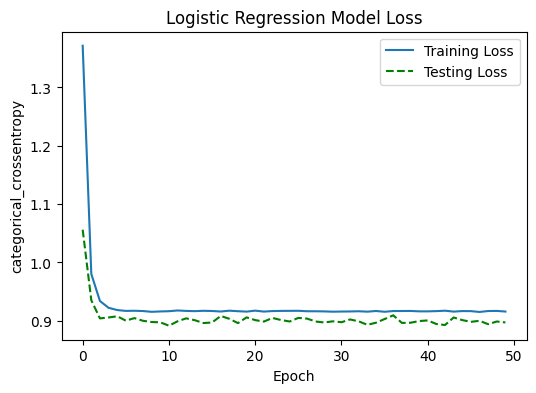

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Logistic Regression Model Loss')
plt.ylabel('categorical_crossentropy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print("Loss after final iteration: ", history.history['val_loss'][-1])
print("Training loss after final iteration ",history.history['loss'][-1])
plt.show()

In [ ]:
import numpy as np
def ohe_to_classes(y):
    '''
        converts one hot encoding to classes
        y: a list of one-hot-encoded classes of data points
    '''
    return [np.argmax(v) for v in y]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
              precision    recall  f1-score   support

           0       0.78      0.67      0.72        58
           1       0.75      0.86      0.80        87
           2       0.49      0.45      0.47        58

    accuracy                           0.69       203
   macro avg       0.67      0.66      0.66       203
weighted avg       0.68      0.69      0.68       203

accuracy 0.6896551724137931


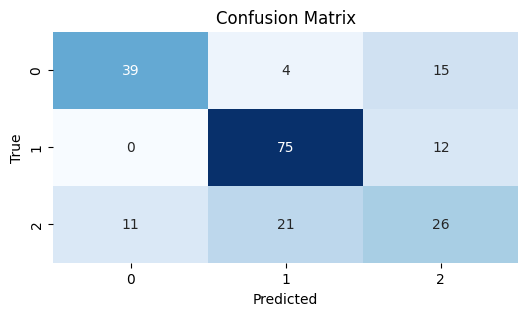

In [ ]:
predicted_all1 = model.predict(np.array(X_test_scaled))
predicted_all=np.argmax(predicted_all1,axis=1)
# print("predicted classes: {}".format(predicted_all))
y_true_classes = ohe_to_classes(y_test)
print(classification_report(y_true_classes,predicted_all))
print('accuracy', accuracy_score(y_true_classes,predicted_all))
confusion_mat = confusion_matrix(y_true_classes,predicted_all)

plt.figure(figsize=(6, 3))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# RNN Model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.3995 - loss: 1.0804 - val_accuracy: 0.5911 - val_loss: 1.0100
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6284 - loss: 0.9569 - val_accuracy: 0.6749 - val_loss: 0.9337
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6630 - loss: 0.9011 - val_accuracy: 0.6847 - val_loss: 0.8831
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6825 - loss: 0.8397 - val_accuracy: 0.6847 - val_loss: 0.8435
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6852 - loss: 0.7997 - val_accuracy: 0.6847 - val_loss: 0.8162
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6854 - loss: 0.7731 - val_accuracy: 0.6749 - val_loss: 0.7914
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6931 - loss: 0.7678 - val_accuracy: 0.6749 - val_loss: 0.7757
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6684 - loss: 0.7508 - val_accuracy: 0.6798 - val_

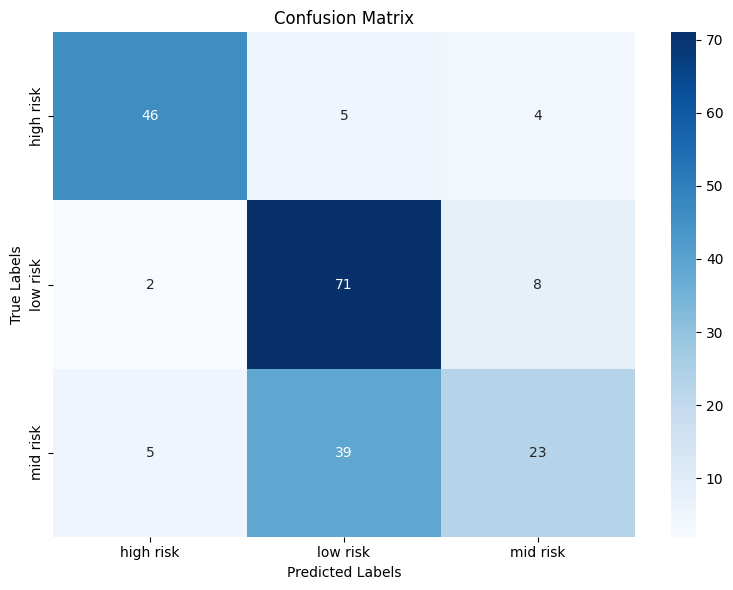

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.utils import to_categorical

# 1. Load the Dataset
data = pd.read_csv('Maternal Health Risk Data Set.csv')  # Update the path as needed

# 2. Preprocessing
# Separate features and target
X = data.drop(columns=['RiskLevel'])
y = data['RiskLevel']

# Encode target if it's categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)  # One-hot encode

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X to 3D for RNN (samples, timesteps, features)
# Assuming each row is one sample with one timestep
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y_categorical, test_size=0.2, random_state=42, stratify=y_encoded
)

# 4. Build the RNN Model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(y_categorical.shape[1], activation='softmax'))  # Output layer

# 5. Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 6. Train the Model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# 7. Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# 8. Generate Predictions
y_pred_prob = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# 9. Classification Report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# 10. Accuracy Score
acc = accuracy_score(y_true_classes, y_pred_classes)
print(f"Accuracy Score: {acc:.4f}")

# 11. Confusion Matrix
confusion_mat = confusion_matrix(y_true_classes, y_pred_classes)

# 12. Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()
